**Enrique Santos Fraire, 3/10/2022**

# Introducción

Utilizando el dataset del bloque anterior se realizó lo siguiente:


1.- Realiza un análisis exploratorio de las variables:

Calcula matriz de varianza y covarianza, así como matriz de correlación de las variables independientes y la dependiente. Explicar qué es la varianza, covarianza y correlación. Interpreta la matriz de correlación. Tiene que utilizar álgebra matricial y corroborar resultados con funciones de Python.

Corre pruebas estadísticas para detectar outliers y leverage points. Tiene que utilizar álgebra matricial para las pruebas y explicar claramente cómo funcionan las pruebas. Puede utilizar funciones de Python para corroborar resultados.

2.- Hace un análisis de multicolinealidad explicando la prueba e implicaciones en el modelo.

3.- Propone e implementa soluciones a los problemas de los puntos anteriores para que el modelo sea el más adecuado.

4.-Estima e interpreta un modelo de regresión múltiple después de atender los problemas anteriores. Tiene que utilizar álgebra matricial para estimar coeficientes y errores estándar del modelo de regresión, y utilizar funciones de Python para corroborar resultados.


# CARGA Y LIMPIEZA DE DATOS

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Mounted at /content/gdrive
/content


In [ ]:
%cd "/content/gdrive/MyDrive/Semestre IA 2/Estadística Avanzada para la Ciencia de Datos"
!ls  # show current directory

/content/gdrive/MyDrive/Semestre IA 2/Estadística Avanzada para la Ciencia de Datos
'Preprocesamiento y análisis de datos multivariados.ipynb'   usfirms2022.csv
 us2022q2a.csv


IMPORTACIÓN DE LIBRERÍAS

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

df1 = pd.read_csv('us2022q2a.csv')
df2 = pd.read_csv('usfirms2022.csv')

DROPEAMOS LOS DATOS QUE NO APORTAN INFORMACIÓN AL MODELO, FISCALMONTH, YEAR Y CTO YA ESTAN EN Q. COUNTRY OF ORIGIN Y ASSET ES INFORMACIÓN QUE NO CAMBIA.

In [ ]:
df1 = df1.drop(['fiscalmonth', 'year', 'cto'], axis=1)
df2 = df2.drop(['N', 'Country\nof Origin', 'Type of Asset'], axis=1)

UNIMOS AMBOS DATA FRAMES.

In [ ]:
df_merge = df1.merge(df2, left_on='firm', right_on='Ticker')
df_merge

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,originalprice,sharesoutstanding,Ticker,Name,Class,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.0000,452000.000,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,73.7500,452271.967,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,48.9375,453014.579,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,54.7500,456366.381,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,30.7300,456769.737,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,5.2900,41251.537,ZYNE,"Zynerba Pharmaceuticals, Inc",Com,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
323812,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,4.2400,41251.537,ZYNE,"Zynerba Pharmaceuticals, Inc",Com,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
323813,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,2.8800,41217.537,ZYNE,"Zynerba Pharmaceuticals, Inc",Com,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
323814,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,2.0500,42447.037,ZYNE,"Zynerba Pharmaceuticals, Inc",Com,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-


ASIGNAMOS EN MULTI-INDEX

In [ ]:
df_merge['qdate'] = pd.PeriodIndex(df_merge['q'], freq="Q")

df_merge.set_index(['firm', 'qdate'], inplace = True)

OBTENEMOS EL ÚLTIMO PRECIO ANUAL Y LOS RETORNOS COMPUESTOS

In [ ]:
df_merge['R'] = np.log(df_merge.groupby(['firm'])['adjprice'].shift(-1)) - np.log(df_merge.groupby(['firm'])['adjprice'].shift(3))

GUARDAMOS UN COPIA DEL DATAFRAME

In [ ]:
df_copy = df_merge.copy()

# DATOS ESTADÍSTICOS Y LIMPIEZA

DROPEAMOS LOS SECTORES QUE NO NECESITAMOS

In [ ]:
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == '-')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Agriculture, Forestry, Fishing and Hunting')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Arts, Entertainment, and Recreation')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Construction')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Finance and Insurance')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Health Care and Social Assistance')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Information')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Manufacturing')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Mining, Quarrying, and Oil and Gas Extraction')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Real Estate and Rental and Leasing')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Retail Trade')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Transportation and Warehousing')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Utilities')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Wholesale Trade')].index)

CONSERVAMOS LOS DATOS DEL PRIMER CUARTO DEL 2022, EL MÁS RECIENTE.

In [ ]:
mask = df_copy['q'] == '2022q1'
df_mask = df_copy[mask]
df_services = df_mask.copy()

In [ ]:
df_services['revenue'].replace(0, np.nan, inplace=True)

SE CREAN LAS COLUMNAS DE DATOS ESTADÍSTICOS QUE NOS AYUDARÁN A RESOLVER LOS PROBLEMAS.

In [ ]:
# Firm Size Measures
df_services['Book'] = df_services['totalassets'] - df_services['totalliabilities']
df_services['Market'] = df_services['originalprice'] * df_services['sharesoutstanding']

# Profit Margin Measures
df_services['EBIT'] = df_services['revenue'] - df_services['cogs'] - df_services['sgae'] - df_services['otheropexp']
df_services['Net Income'] = df_services['EBIT'] + df_services['extraincome']- df_services['incometax'] - df_services['finexp']
df_services['Earnings Per Share (EPS)'] = df_services['Net Income'] / df_services['sharesoutstanding']

# Se eligen los 3 márgenes para el análisis estadístico
df_services['EPSP (deflated by price)'] = df_services['Earnings Per Share (EPS)'] / df_services['originalprice']
df_services['Operating Profit Margin (OPM)'] = df_services['EBIT'] / df_services['revenue']
df_services['Book-to-Market ratio'] = df_services['Book'] / df_services['Market']

In [ ]:
df_services.dropna(subset=["Market"], how="all", inplace=True)

VARIABLES DUUMIES DEL TAMAÑO PARA OBTENER LAS EMPRESAS PEQUEÑAS, MEDIANAS Y GRANDES.

In [ ]:
def dense_inclusive_pct(x):
    r = x.rank(method='dense') - 1
    return r / r.max() * 100

df_services["pct"]=df_services.groupby('q')['Market'].apply(dense_inclusive_pct).astype(int)

df_services["isSmall"] = df_services.pct <= 33
df_services["isSmall"] = df_services["isSmall"].astype(int)

df_services["isMedium"] = (df_services.pct <= 66) & (df_services.pct > 33) 
df_services["isMedium"] = df_services["isMedium"].astype(int)

In [ ]:
len(df_services)

375

In [ ]:
df_services.head(10)

,,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,Market,EBIT,Net Income,Earnings Per Share (EPS),EPSP (deflated by price),Operating Profit Margin (OPM),Book-to-Market ratio,pct,isSmall,isMedium
firm,qdate,,,,,,,,,,,,,,,,,,,,,
ABM,2022Q1,2022q1,1936200.0,1659600.0,170600.0,0.0,500.0,6200.0,24300.0,4504900.0,2849600.0,...,3.078651e+06,106000.0,76000.0,1.136550,0.024686,0.054746,0.537670,61,0,1
ABNB,2022Q1,2022q1,1508937.0,362623.0,918116.0,233329.0,-1935.0,1020.0,10706.0,17068442.0,12331026.0,...,1.088397e+08,-5131.0,-18792.0,-0.029656,-0.000173,-0.003400,0.043527,98,0,0
ABSI,2022Q1,2022q1,819.0,0.0,29622.0,0.0,125.0,195.0,621.0,395460.0,54964.0,...,7.820738e+05,-28803.0,-29494.0,-0.317917,-0.037713,-35.168498,0.435376,36,0,1
ACCD,2022Q1,2022q1,93756.0,43593.0,87109.0,-7134.0,-114.0,768.0,3862.0,1285529.0,429735.0,...,1.175789e+06,-29812.0,-34556.0,-0.516082,-0.029390,-0.317974,0.727846,42,0,1
ACM,2022Q1,2022q1,3213658.0,3003706.0,37098.0,73292.0,2179.0,24173.0,36011.0,11196063.0,8546410.0,...,1.085654e+07,99562.0,41557.0,0.294016,0.003828,0.030981,0.244061,82,0,0
ACVA,2022Q1,2022q1,103065.0,60888.0,38437.0,32829.0,44.0,210.0,240.0,1019344.0,485722.0,...,2.314308e+06,-29089.0,-29495.0,-0.188748,-0.012745,-0.282239,0.230575,54,0,1
ADT,2022Q1,2022q1,1544747.0,509768.0,958471.0,528.0,1496.0,6307.0,19524.0,17014781.0,13734514.0,...,5.821701e+06,75980.0,51645.0,0.067332,0.008871,0.049186,0.563455,74,0,0
AGTI,2022Q1,2022q1,294444.0,170817.0,86138.0,0.0,-28.0,10664.0,6905.0,2487261.0,1561243.0,...,2.766654e+06,37489.0,19892.0,0.151707,0.007190,0.127321,0.334707,59,0,1
AGYS,2022Q1,2022q1,46558.0,18866.0,25152.0,995.0,198.0,-7.0,-232.0,214162.0,116818.0,...,9.856076e+05,1545.0,1982.0,0.080196,0.002011,0.033184,0.098765,40,0,1


# Matrices

RENOMBRAMOS COLUMNAS PARA TRABAJAR MÁS FACILMENTE CON ELLAS

In [ ]:
df_services.rename(columns = {'EPSP (deflated by price)':'EPSP', 'Operating Profit Margin (OPM)':'OPM', 'Book-to-Market ratio':'BtMr'}, inplace = True)
df_services = df_services.reset_index()

ASIGNAMOS LAS X'S Y LAS Y'S

In [ ]:
temp = df_services[['EPSP', 'OPM', 'BtMr', 'isSmall', 'isMedium', 'R']]
temp = temp.dropna()
x = temp[['EPSP', 'OPM', 'BtMr', 'isSmall', 'isMedium']]
y = temp['R']

SE OBTIENEN LAS MATRIZ DE VARIANZA Y COVARIANZA SIGUIENDO EL PROCEDIMIENTO DEL DOCUMENTO. SIMPLIFICANDOSE EN LA SIGUIENTE FÓRUMULA:

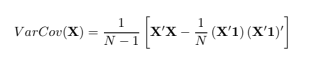

## Solución 1 Varianza-Covarianza

In [ ]:
x_transpose = x.transpose()

In [ ]:
temp1 = x_transpose.dot(x)

In [ ]:
ones = np.ones((x_transpose.shape[1], 1))

In [ ]:
temp2 = x_transpose.dot(ones)

In [ ]:
temp3 = temp2.transpose()

In [ ]:
temp4 = temp2.dot(temp3)

In [ ]:
temp5 = temp4 / x.shape[0]

In [ ]:
temp6 = temp1 - temp5

In [ ]:
varcov = temp6 / (x.shape[0] - 1)

In [ ]:
varcov

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,0.008576,0.095351,-0.006378,-0.011938,0.004549
OPM,0.095351,266.685817,0.037558,0.087182,-0.580925
BtMr,-0.006378,0.037558,0.260931,0.086589,-0.023577
isSmall,-0.011938,0.087182,0.086589,0.223518,-0.106857
isMedium,0.004549,-0.580925,-0.023577,-0.106857,0.217431


COMPROBACIÓN DE LA MATRIZ DE VARIANZA-COVARIANZA

In [ ]:
x.cov()

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,0.008576,0.095351,-0.006378,-0.011938,0.004549
OPM,0.095351,266.685817,0.037558,0.087182,-0.580925
BtMr,-0.006378,0.037558,0.260931,0.086589,-0.023577
isSmall,-0.011938,0.087182,0.086589,0.223518,-0.106857
isMedium,0.004549,-0.580925,-0.023577,-0.106857,0.217431


## Solución 2 Varianza-Covarianza

In [ ]:
x_transpose = x.transpose()

In [ ]:
n = len(x)

In [ ]:
ones = np.ones((n,1))

In [ ]:
xt = x_transpose.dot(ones)

In [ ]:
xtx = x_transpose.dot(x)

In [ ]:
xt1t = xt.transpose()

In [ ]:
VarCov = (1/(n-1))*(xtx - (1/n)*(xt.dot(xt1t)) )

In [ ]:
VarCov

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,0.008576,0.095351,-0.006378,-0.011938,0.004549
OPM,0.095351,266.685817,0.037558,0.087182,-0.580925
BtMr,-0.006378,0.037558,0.260931,0.086589,-0.023577
isSmall,-0.011938,0.087182,0.086589,0.223518,-0.106857
isMedium,0.004549,-0.580925,-0.023577,-0.106857,0.217431


COMPROBACIÓN DE LA MATRIZ DE VARIANZA-COVARIANZA

In [ ]:
x.cov()

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,0.008576,0.095351,-0.006378,-0.011938,0.004549
OPM,0.095351,266.685817,0.037558,0.087182,-0.580925
BtMr,-0.006378,0.037558,0.260931,0.086589,-0.023577
isSmall,-0.011938,0.087182,0.086589,0.223518,-0.106857
isMedium,0.004549,-0.580925,-0.023577,-0.106857,0.217431


## Correlaciones

A PARTIR DE LAS DESVIACIONES ESTÁNDAR Y LA MATRIZ DE VARIANZA-COVARAINZA OBTENEMOS LAS CORRELACIONES.

In [ ]:
varcov

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,0.008576,0.095351,-0.006378,-0.011938,0.004549
OPM,0.095351,266.685817,0.037558,0.087182,-0.580925
BtMr,-0.006378,0.037558,0.260931,0.086589,-0.023577
isSmall,-0.011938,0.087182,0.086589,0.223518,-0.106857
isMedium,0.004549,-0.580925,-0.023577,-0.106857,0.217431


In [ ]:
var = np.array([])
for i in range(len(varcov)) :
  var = np.append(var, varcov.iloc[i,i])

In [ ]:
vars = pd.DataFrame(var)
vars = vars.transpose()

In [ ]:
vars.columns = ['EPSP','OPM','BtMr', 'isSmall', 'isMedium']

In [ ]:
vars

,EPSP,OPM,BtMr,isSmall,isMedium
0,0.008576,266.685817,0.260931,0.223518,0.217431


In [ ]:
stds = np.sqrt(var)

In [ ]:
stds

array([ 0.09260701, 16.33051797,  0.51081429,  0.47277688,  0.46629533])

In [ ]:
std_dev = [[ 0 for y in range( len(stds) ) ] for x in range( len(stds) )]
for i in range(len(stds)):
  for j in range(len(stds)):
    std_dev[i][j] = stds[i] * stds[j]

In [ ]:
varcov2 = varcov.to_numpy()

In [ ]:
corr = varcov2 / std_dev

In [ ]:
corr

array([[ 1.        ,  0.0630495 , -0.1348371 , -0.27267741,  0.10534454],
       [ 0.0630495 ,  1.        ,  0.0045024 ,  0.01129204, -0.07628849],
       [-0.1348371 ,  0.0045024 ,  1.        ,  0.358543  , -0.09898189],
       [-0.27267741,  0.01129204,  0.358543  ,  1.        , -0.4847154 ],
       [ 0.10534454, -0.07628849, -0.09898189, -0.4847154 ,  1.        ]])

In [ ]:
corr = pd.DataFrame(corr)

In [ ]:
corr.columns = ['EPSP','OPM','BtMr', 'isSmall', 'isMedium']

In [ ]:
corr = corr.transpose()
corr.columns = ['EPSP','OPM','BtMr', 'isSmall', 'isMedium']

In [ ]:
corr

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,1.000000,0.063049,-0.134837,-0.272677,0.105345
OPM,0.063049,1.000000,0.004502,0.011292,-0.076288
BtMr,-0.134837,0.004502,1.000000,0.358543,-0.098982
isSmall,-0.272677,0.011292,0.358543,1.000000,-0.484715
isMedium,0.105345,-0.076288,-0.098982,-0.484715,1.000000


COMPROBACIÓN DE CORRELACIÓN

In [ ]:
x.corr()

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,1.000000,0.063049,-0.134837,-0.272677,0.105345
OPM,0.063049,1.000000,0.004502,0.011292,-0.076288
BtMr,-0.134837,0.004502,1.000000,0.358543,-0.098982
isSmall,-0.272677,0.011292,0.358543,1.000000,-0.484715
isMedium,0.105345,-0.076288,-0.098982,-0.484715,1.000000


## Modelo de regresión multiple

### Betas

OBTENCIÓN DE LAS BETAS

In [ ]:
x['1'] = 1

In [ ]:
x = x[['1', 'EPSP', 'OPM', 'BtMr', 'isSmall', 'isMedium']]

In [ ]:
xt = x.transpose()

In [ ]:
x2 = xt.dot(x)

In [ ]:
xinv = np.linalg.inv(x2)

In [ ]:
aux = np.dot(xinv, xt)

In [ ]:
H = x.dot(aux)

LEVERAGE POINTS

In [ ]:
np.diag(H)

array([0.01025462, 0.00871351, 0.01191687, 0.00844201, 0.00939976,
       0.01020374, 0.00931916, 0.00980534, 0.17866207, 0.00841759,
       0.09252003, 0.00861461, 0.01859177, 0.009441  , 0.01040644,
       0.01266513, 0.00858478, 0.01085383, 0.00856022, 0.0085951 ,
       0.01481655, 0.03721917, 0.01306716, 0.07908719, 0.00859619,
       0.00853904, 0.01035149, 0.01077289, 0.01389394, 0.01877453,
       0.02718413, 0.00984729, 0.00876822, 0.0100631 , 0.0110667 ,
       0.0087734 , 0.00851351, 0.01163087, 0.01015548, 0.00850018,
       0.00910371, 0.00953157, 0.01077594, 0.00941962, 0.0095676 ,
       0.12072698, 0.01159286, 0.0095178 , 0.00928477, 0.00842606,
       0.0087029 , 0.01344211, 0.01027689, 0.00846845, 0.00867828,
       0.03171133, 0.01009338, 0.0106215 , 0.0106203 , 0.01142664,
       0.00840464, 0.00841862, 0.01125243, 0.00971634, 0.01024145,
       0.0084653 , 0.01302169, 0.00853792, 0.00927081, 0.00853251,
       0.01107292, 0.01061936, 0.01259319, 0.0119897 , 0.00905

In [ ]:
Betas = aux.dot(y)

In [ ]:
Betas

array([-0.3211842 ,  3.05225513,  0.00723722, -0.019992  , -0.2170283 ,
       -0.13466137])

In [ ]:
B = pd.DataFrame(Betas)
B = B.transpose()
B.columns = ['b','EPSP','OPM', 'BtMr', 'isSmall', 'isMedium']
B = B.transpose()

In [ ]:
B

,0
b,-0.321184
EPSP,3.052255
OPM,0.007237
BtMr,-0.019992
isSmall,-0.217028
isMedium,-0.134661


### Predicción

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
XB = x.dot(Betas)

In [ ]:
ym = pd.DataFrame(y)

### OUTLIERS

In [ ]:
ym.describe()

,R
count,343.000000
mean,-0.496691
std,0.638242
min,-3.482115
25%,-0.774205
50%,-0.320379
75%,-0.079993
max,1.591808


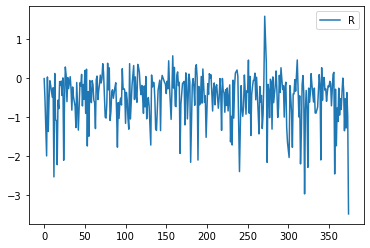

In [ ]:
ym.plot()

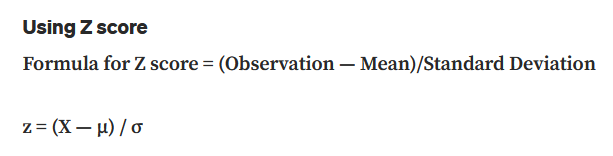

In [ ]:
outliers=[]
def detect_outlier(data_1):
  threshold=3
  mean_1 = np.mean(data_1)
  std_1 =np.std(data_1)
  
  for y in data_1:
      z_score= (y - mean_1)/std_1 
      if np.abs(z_score) > threshold:
          outliers.append(y)
  return outliers

In [ ]:
outlier_datapoints = detect_outlier(y)
print(outlier_datapoints)

[-2.5322033644910658, 1.5918076810578297, -2.9681171065210177, -2.455893431061544, -3.4821152534848174]


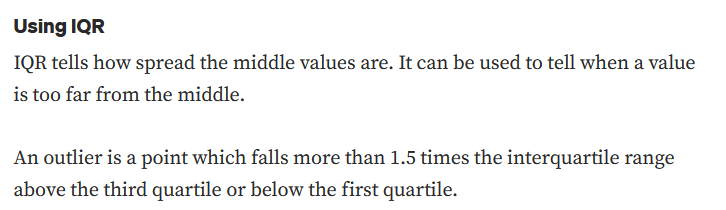

In [ ]:
y_sorted = sorted(y)

In [ ]:
q1, q3= np.percentile(y_sorted,[25,75])

In [ ]:
print('q1: ',q1)
print('q3: ',q3)

q1:  -0.7742052563984594
q3:  -0.07999276836392633


In [ ]:
iqr = q3 - q1

In [ ]:
print('iqr: ',q1)

iqr:  -0.7742052563984594


In [ ]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [ ]:
print('lower_bound: ',lower_bound)
print('upper_bound: ',upper_bound)
print('Anything outside of ', lower_bound, ' and ', upper_bound, ' is an outlier.')

lower_bound:  -1.815523988450259
upper_bound:  0.9613259636878733
Anything outside of  -1.815523988450259  and  0.9613259636878733  is an outlier.


### LEVERAGE POINTS

In [ ]:
leverage_points = XB.dot(ym)

In [ ]:
leverage_points

R    125.909954
dtype: float64

### MSE

In [ ]:
y_pred = x * Betas

In [ ]:
y_pred

,1,EPSP,OPM,BtMr,isSmall,isMedium
0,-0.321184,0.075348,0.000396,-0.010749,-0.000000,-0.134661
1,-0.321184,-0.000527,-0.000025,-0.000870,-0.000000,-0.000000
3,-0.321184,-0.089705,-0.002301,-0.014551,-0.000000,-0.134661
4,-0.321184,0.011684,0.000224,-0.004879,-0.000000,-0.000000
5,-0.321184,-0.038900,-0.002043,-0.004610,-0.000000,-0.134661
...,...,...,...,...,...,...
370,-0.321184,0.009406,0.000453,-0.001490,-0.000000,-0.134661
371,-0.321184,0.042707,0.001701,-0.003295,-0.000000,-0.000000
372,-0.321184,-0.009004,-0.002377,-0.000317,-0.000000,-0.000000
373,-0.321184,-0.812779,-0.000849,-0.008065,-0.217028,-0.000000


In [ ]:
y_pred['sum'] = y_pred['1'] + y_pred['isSmall'] + y_pred['isMedium'] + y_pred['EPSP'] + y_pred['OPM'] + y_pred['BtMr']

In [ ]:
y_pred

,1,EPSP,OPM,BtMr,isSmall,isMedium,sum
0,-0.321184,0.075348,0.000396,-0.010749,-0.000000,-0.134661,-0.390850
1,-0.321184,-0.000527,-0.000025,-0.000870,-0.000000,-0.000000,-0.322606
3,-0.321184,-0.089705,-0.002301,-0.014551,-0.000000,-0.134661,-0.562403
4,-0.321184,0.011684,0.000224,-0.004879,-0.000000,-0.000000,-0.314156
5,-0.321184,-0.038900,-0.002043,-0.004610,-0.000000,-0.134661,-0.501398
...,...,...,...,...,...,...,...
370,-0.321184,0.009406,0.000453,-0.001490,-0.000000,-0.134661,-0.447477
371,-0.321184,0.042707,0.001701,-0.003295,-0.000000,-0.000000,-0.280072
372,-0.321184,-0.009004,-0.002377,-0.000317,-0.000000,-0.000000,-0.332882
373,-0.321184,-0.812779,-0.000849,-0.008065,-0.217028,-0.000000,-1.359906


In [ ]:
E = y - y_pred['sum']

In [ ]:
aux = E * E

In [ ]:
aux

0      0.146381
1      0.048054
3      2.047263
4      0.120854
5      0.747237
         ...   
370    0.005568
371    0.993166
372    0.001247
373    0.142802
374    4.351922
Length: 343, dtype: float64

In [ ]:
MSE = aux.sum()

In [ ]:
MSE

98.02323792759685

### Modelo

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
mod = smf.ols('R ~ isSmall + isMedium + EPSP + OPM + BtMr', data = temp).fit()

print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     28.39
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           5.17e-24
Time:                        20:30:53   Log-Likelihood:                -271.89
No. Observations:                 343   AIC:                             555.8
Df Residuals:                     337   BIC:                             578.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3212      0.051     -6.310      0.0

## Multicolinealidad

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif_data)

    feature       VIF
0         1  3.054836
1      EPSP  1.087882
2       OPM  1.011299
3      BtMr  1.159081
4   isSmall  1.579139
5  isMedium  1.327638
